In [59]:
import pandas as pd
import numpy as np

df = pd.read_csv('../data/ES_2024-05-26_2024-06-25_5M.csv')
df

,datetime,symbol,open,high,low,close,volume
0,2024-05-26 17:00:00,CME_MINI:ES1!,5321.75,5324.00,5321.25,5323.25,702.0
1,2024-05-26 17:05:00,CME_MINI:ES1!,5323.25,5324.00,5323.00,5323.00,267.0
2,2024-05-26 17:10:00,CME_MINI:ES1!,5323.00,5324.25,5323.00,5324.00,194.0
3,2024-05-26 17:15:00,CME_MINI:ES1!,5324.00,5324.25,5323.25,5323.50,225.0
4,2024-05-26 17:20:00,CME_MINI:ES1!,5323.50,5323.75,5323.00,5323.00,64.0
...,...,...,...,...,...,...,...
5971,2024-06-25 15:35:00,CME_MINI:ES1!,5533.75,5535.00,5533.50,5534.50,1028.0
5972,2024-06-25 15:40:00,CME_MINI:ES1!,5534.50,5535.25,5534.50,5534.75,1069.0
5973,2024-06-25 15:45:00,CME_MINI:ES1!,5534.50,5534.75,5534.25,5534.25,695.0
5974,2024-06-25 15:50:00,CME_MINI:ES1!,5534.25,5535.00,5534.00,5534.75,804.0


In [60]:
df = df.drop(['open', 'high', 'low', 'symbol', 'volume'], axis=1)
df

,datetime,close
0,2024-05-26 17:00:00,5323.25
1,2024-05-26 17:05:00,5323.00
2,2024-05-26 17:10:00,5324.00
3,2024-05-26 17:15:00,5323.50
4,2024-05-26 17:20:00,5323.00
...,...,...
5971,2024-06-25 15:35:00,5534.50
5972,2024-06-25 15:40:00,5534.75
5973,2024-06-25 15:45:00,5534.25
5974,2024-06-25 15:50:00,5534.75


In [61]:
df.set_index('datetime', inplace=True)
df

# only one column left Date as index which not list on title

,close
datetime,
2024-05-26 17:00:00,5323.25
2024-05-26 17:05:00,5323.00
2024-05-26 17:10:00,5324.00
2024-05-26 17:15:00,5323.50
2024-05-26 17:20:00,5323.00
...,...
2024-06-25 15:35:00,5534.50
2024-06-25 15:40:00,5534.75
2024-06-25 15:45:00,5534.25


In [62]:
df.reset_index(inplace=True)
df

,datetime,close
0,2024-05-26 17:00:00,5323.25
1,2024-05-26 17:05:00,5323.00
2,2024-05-26 17:10:00,5324.00
3,2024-05-26 17:15:00,5323.50
4,2024-05-26 17:20:00,5323.00
...,...,...
5971,2024-06-25 15:35:00,5534.50
5972,2024-06-25 15:40:00,5534.75
5973,2024-06-25 15:45:00,5534.25
5974,2024-06-25 15:50:00,5534.75


Available styles: ['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


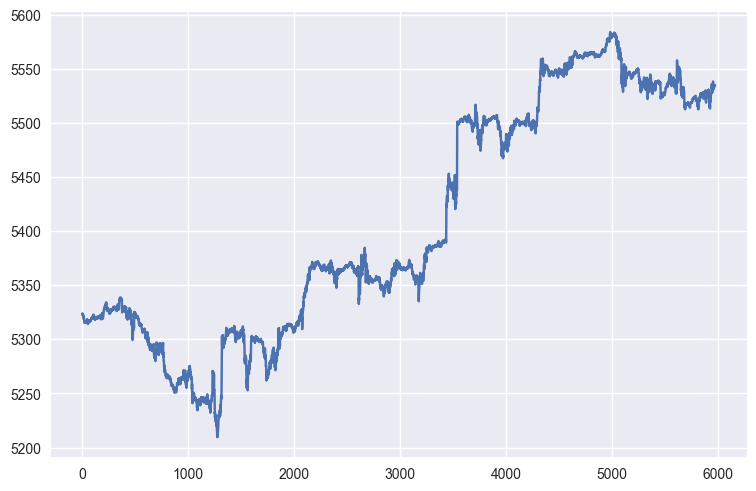

In [69]:
# plot chart
import matplotlib.pyplot as plt
# Check available styles
print("Available styles:", plt.style.available)

# plt.style.use('seaborn-muted')
plt.style.use('seaborn-v0_8')
plt.plot(df.close)
plt.show()

In [72]:
# Calculate daily return
STARTING_BALANCE = 100
df['Return'] = df.close / df.close.shift(1)
df.Return.iat[0] = 1
df['Bench_Bal'] = STARTING_BALANCE * df.Return.cumprod()
df

,datetime,close,Return,Bench_Bal,Bench_Peak,Bench_DD
0,2024-05-26 17:00:00,5323.25,1.000000,100.000000,100.000000,0.000000
1,2024-05-26 17:05:00,5323.00,0.999953,99.995304,100.000000,-0.004696
2,2024-05-26 17:10:00,5324.00,1.000188,100.014089,100.014089,0.000000
3,2024-05-26 17:15:00,5323.50,0.999906,100.004696,100.014089,-0.009393
4,2024-05-26 17:20:00,5323.00,0.999906,99.995304,100.014089,-0.018786
...,...,...,...,...,...,...
5971,2024-06-25 15:35:00,5534.50,1.000136,103.968440,104.903020,-0.934579
5972,2024-06-25 15:40:00,5534.75,1.000045,103.973137,104.903020,-0.929883
5973,2024-06-25 15:45:00,5534.25,0.999910,103.963744,104.903020,-0.939276
5974,2024-06-25 15:50:00,5534.75,1.000090,103.973137,104.903020,-0.929883


`df.close.shift(1)`
When you use `df.close.shift(1)`, it shifts the values in the close column down by one period.
This means that each value is moved to the next row, and the first row becomes `NaN`.

`df.close.shift(-1)`
When you use `df.close.shift(-1)`, it shifts the values in the close column up by one period. This means that each value is moved to the previous row, and the last row becomes `NaN`.

Summary
`df.close.shift(1)`: Shifts the close column down by one period. This is typically used to compare the current value with the previous value.

    * First row becomes NaN.
    * Each subsequent row contains the value from the previous row.

`df.close.shift(-1)`: Shifts the close column up by one period. This is typically used to compare the current value with the next value.

    * Last row becomes NaN.
    * Each previous row contains the value from the next row.

The `cumprod()` method in pandas is used to compute the cumulative product of a DataFrame or Series. When you apply `cumprod()` to a Series, it returns a Series where each element is the cumulative product of all previous elements up to that point. This method is often used in financial analysis to calculate the cumulative return of an investment over time.

In [71]:
# calculate drawdown
df['Bench_Peak'] = df.Bench_Bal.cummax()
df['Bench_DD'] = df.Bench_Bal - df.Bench_Peak

bench_dd = round((df.Bench_DD / df.Bench_Peak).min() * 100, 2)
bench_dd

-2.42

In [41]:
# calculate MACD
exp1 = df.close.ewm(span = 12, adjust = False).mean()
exp2 = df.close.ewm(span = 26, adjust = False).mean()

macd= exp1 - exp2
signal = macd.ewm(span = 9, adjust = False).mean()

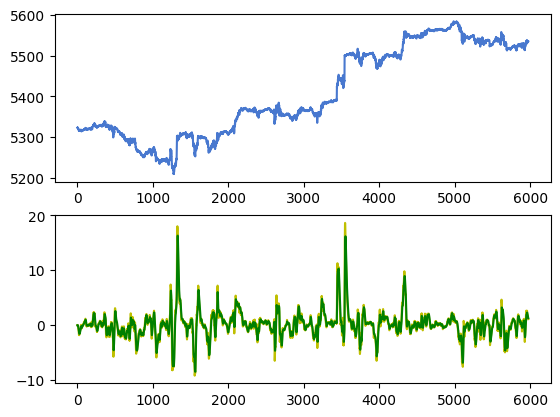

In [43]:
plt.figure()

# create subplot for price data
plt.subplot(211)  # 2 rows, 1 column, 1st subplot
plt.plot(df.close)

# create subplot for macd
plt.subplot(212) # 2 rows, 1 column, 2nd subplot
plt.plot(macd, color = 'y')
plt.plot(signal, color = 'g')

plt.show()


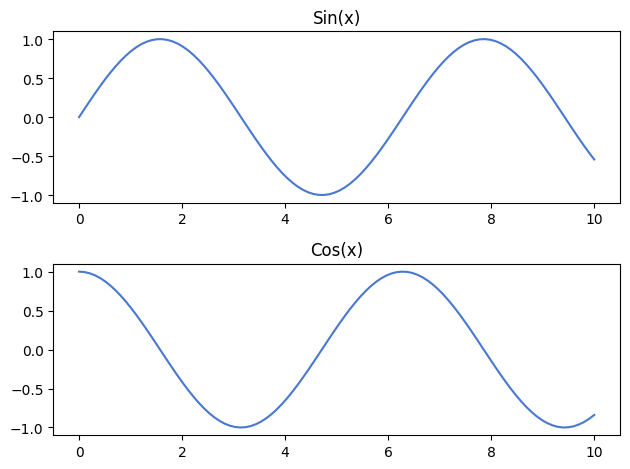

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Generate example data
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

# Create a figure
plt.figure()

# First subplot
plt.subplot(211)  # 2 rows, 1 column, 1st subplot
plt.plot(x, y1)
plt.title('Sin(x)')

# Second subplot
plt.subplot(212)  # 2 rows, 1 column, 2nd subplot
plt.plot(x, y2)
plt.title('Cos(x)')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()


In [74]:
# add column for entries
df['Long'] = macd > signal
df

,datetime,close,Return,Bench_Bal,Bench_Peak,Bench_DD,Long
0,2024-05-26 17:00:00,5323.25,1.000000,100.000000,100.000000,0.000000,False
1,2024-05-26 17:05:00,5323.00,0.999953,99.995304,100.000000,-0.004696,False
2,2024-05-26 17:10:00,5324.00,1.000188,100.014089,100.014089,0.000000,True
3,2024-05-26 17:15:00,5323.50,0.999906,100.004696,100.014089,-0.009393,True
4,2024-05-26 17:20:00,5323.00,0.999906,99.995304,100.014089,-0.018786,True
...,...,...,...,...,...,...,...
5971,2024-06-25 15:35:00,5534.50,1.000136,103.968440,104.903020,-0.934579,False
5972,2024-06-25 15:40:00,5534.75,1.000045,103.973137,104.903020,-0.929883,False
5973,2024-06-25 15:45:00,5534.25,0.999910,103.963744,104.903020,-0.939276,False
5974,2024-06-25 15:50:00,5534.75,1.000090,103.973137,104.903020,-0.929883,False


In [75]:
# calculate system return and balance
df['Sys_Ret'] = np.where(df.Long.shift(1) == True, df.Return, 1)
df['Sys_Bal'] = STARTING_BALANCE * df.Sys_Ret.cumprod()
df

,datetime,close,Return,Bench_Bal,Bench_Peak,Bench_DD,Long,Sys_Ret,Sys_Bal
0,2024-05-26 17:00:00,5323.25,1.000000,100.000000,100.000000,0.000000,False,1.000000,100.000000
1,2024-05-26 17:05:00,5323.00,0.999953,99.995304,100.000000,-0.004696,False,1.000000,100.000000
2,2024-05-26 17:10:00,5324.00,1.000188,100.014089,100.014089,0.000000,True,1.000000,100.000000
3,2024-05-26 17:15:00,5323.50,0.999906,100.004696,100.014089,-0.009393,True,0.999906,99.990609
4,2024-05-26 17:20:00,5323.00,0.999906,99.995304,100.014089,-0.018786,True,0.999906,99.981217
...,...,...,...,...,...,...,...,...,...
5971,2024-06-25 15:35:00,5534.50,1.000136,103.968440,104.903020,-0.934579,False,1.000000,102.192001
5972,2024-06-25 15:40:00,5534.75,1.000045,103.973137,104.903020,-0.929883,False,1.000000,102.192001
5973,2024-06-25 15:45:00,5534.25,0.999910,103.963744,104.903020,-0.939276,False,1.000000,102.192001
5974,2024-06-25 15:50:00,5534.75,1.000090,103.973137,104.903020,-0.929883,False,1.000000,102.192001


In [76]:
# calculate system drawdown
df['Sys_Peak'] = df.Sys_Bal.cummax()
df['Sys_DD'] = df.Sys_Bal - df.Sys_Peak

sys_dd = round((df.Sys_DD / df.Sys_Peak).min() * 100, 2)
sys_dd

-1.32

In [77]:
# calculate metrics
bench_return = round(((df.Bench_Bal[1] / df.Bench_Bal[0]) - 1) * 100, 2)

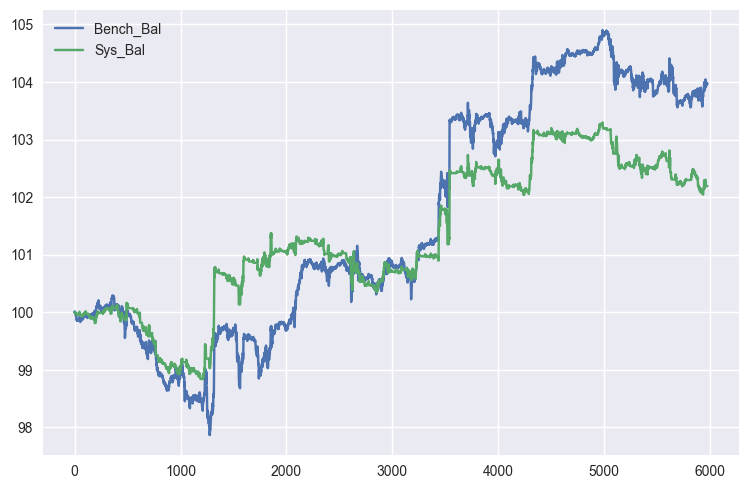

In [80]:
plt.plot(df.Bench_Bal, label = 'Bench_Bal')
plt.plot(df.Sys_Bal, label = 'Sys_Bal')
plt.legend()
plt.show()

In [81]:
# define list of ETFs to backtest
symbols = ['^GSPC', '^DJI', '^IXIC', '^RUT', '^N255']